# Bandit Problem

In [15]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [16]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [17]:
bandits[0].pullLever()

2.109215782054503

## Greedy algorithm Implementation

In [18]:
bandits = [Bandit(random.random() * 4 - 2) for _ in range(10)]

def run_greedy(num_steps=1000):

    q = np.zeros(10)
    n = np.zeros(10)

    rewards = []

    for t in range(num_steps):

        i = np.argmax(q)
        reward = bandits[i].pullLever()
        rewards.append(reward)

        n[i] += 1
        r = 1 / n[i]
        q[i] = q[i] + r * (reward - q[i])

    return rewards


Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

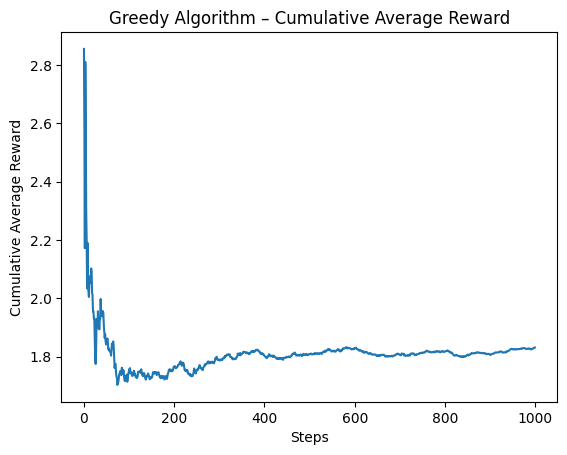

In [19]:
# Plot
reward = run_greedy(1000)
cum_avg = np.cumsum(reward) / (np.arange(len(reward)) + 1)
plt.plot(cum_avg)
plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.title("Greedy Algorithm – Cumulative Average Reward")
plt.show()

## $\epsilon$-greedy Algorithm

In [20]:

def run_epsilon_greedy(epsilon, iterations=1000):
    n = np.zeros(10)
    q = np.zeros(10)
    rewards = []

    for i in range(iterations):
        if random.random() < epsilon:

            i = random.randint(0,9)
        else:
            i = np.argmax(q)

        reward = bandits[i].pullLever()
        rewards.append(reward)
        q[i] += 1
        r = q[i]
        q[i] += (1/r) * (reward - q[i])

    return rewards


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

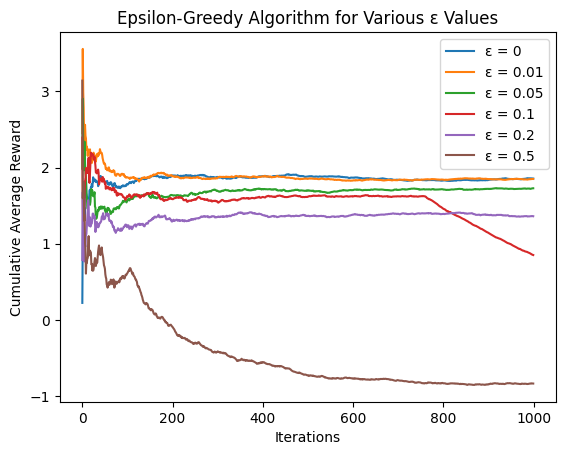

In [23]:

epsilons = [0, 0.01, 0.05, 0.1, 0.2, 0.5]
for i in range(6):
    reward = run_epsilon_greedy(epsilons[i])
    cumEp_avg = np.cumsum(reward) / (np.arange(len(reward)) + 1)
    plt.plot(cumEp_avg, label=f"ε = {epsilons[i]}")

plt.xlabel('Iterations')
plt.ylabel('Cumulative Average Reward')
plt.title('Epsilon-Greedy Algorithm for Various ε Values')
plt.legend()
plt.show()


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

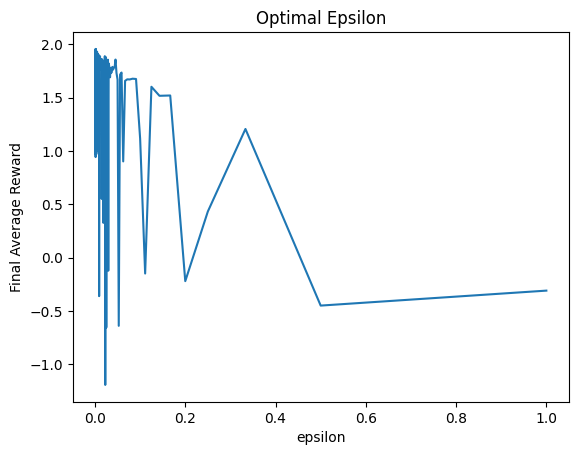

Optimal epsilon: 0.001277139208173691
Best reward: 1.9572767890010547


In [26]:
avg_rewards = []
eps = []

for i in range(1, 1001):
    eps.append(1/i)
    reward = run_epsilon_greedy(eps[i-1])
    cum_avg = np.cumsum(reward) / (np.arange(len(reward)) + 1)
    avg_rewards.append(cum_avg[-1])

plt.plot(eps, avg_rewards)
plt.xlabel('epsilon')
plt.ylabel('Final Average Reward')
plt.title('Optimal Epsilon')
plt.show()
optimal_index = np.argmax(avg_rewards)
optimal_epsilon = eps[optimal_index]
print(f"Optimal epsilon: {optimal_epsilon}")
print(f"Best reward: {avg_rewards[optimal_index]}")

## Optimistic Initial Values

In [27]:
def run_optimistic_greedy(initial_value=10, iterations=1000):
    n = np.zeros(10)
    q = np.ones(10)*10
    rewards = []

    for a in range(iterations):
        i= np.argmax(q)
        reward = bandits[i].pullLever()
        rewards.append(reward)
        n[i] += 1
        r = n[i]
        q[i] += (1/r) * (reward - q[i])

    return rewards


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

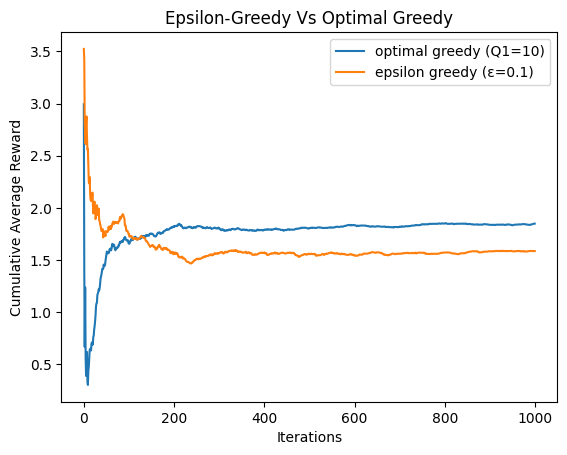

In [28]:
opt_greedy = run_optimistic_greedy(10)
reward1 = np.cumsum(opt_greedy) / (np.arange(len(opt_greedy)) + 1)
eps_greedy = run_epsilon_greedy(0.1)
reward2 = np.cumsum(eps_greedy) / (np.arange(len(eps_greedy)) + 1)
plt.plot(reward1, label="optimal greedy (Q1=10)")
plt.plot(reward2, label="epsilon greedy (ε=0.1)")
plt.xlabel('Iterations')
plt.ylabel('Cumulative Average Reward')
plt.title('Epsilon-Greedy Vs Optimal Greedy')
plt.legend()
plt.show()

## Upper Confidence Bound (UCB)

In [29]:
def run_ucb(c, iterations=1000):

    n = np.zeros(10)
    q = np.zeros(10)
    rewards = []

    for i in range(10):
        reward = bandits[i].pullLever()
        rewards.append(reward)
        n[i] = 1
        q[i] = reward

    for t in range(10, iterations):
        ucb_values = [
            q[i] + c * np.sqrt(np.log(t) / n[i])
            for i in range(10)
        ]
        i = np.argmax(ucb_values)
        reward = bandits[i].pullLever()
        rewards.append(reward)
        n[i] += 1
        r = n[i]
        q[i] += (1/r) * (reward - q[i])

    return rewards

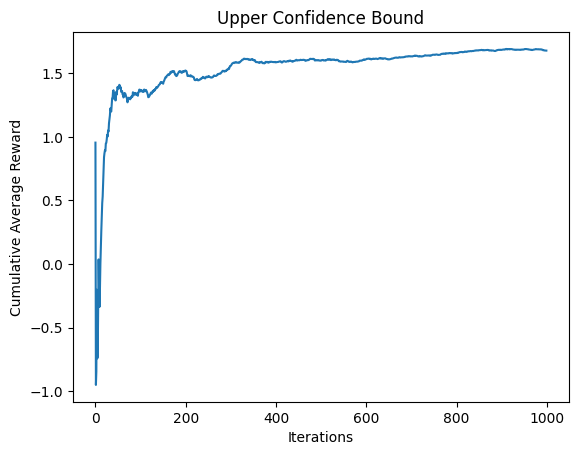

In [31]:
rewards= run_ucb(2)
cum_avg = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
plt.plot(cum_avg)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Average Reward')
plt.title('Upper Confidence Bound')
plt.show()